In [10]:
import pandas as pd
games = pd.read_csv('games.csv')

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [12]:
games = games[['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away', 'PTS_home','PTS_away','HOME_TEAM_WINS']]
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0


In [13]:
games['GAME_DATE_EST'] = pd.to_datetime(games['GAME_DATE_EST'])

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GAME_DATE_EST     26651 non-null  datetime64[ns]
 1   GAME_ID           26651 non-null  int64         
 2   GAME_STATUS_TEXT  26651 non-null  object        
 3   TEAM_ID_home      26651 non-null  int64         
 4   TEAM_ID_away      26651 non-null  int64         
 5   PTS_home          26552 non-null  float64       
 6   PTS_away          26552 non-null  float64       
 7   HOME_TEAM_WINS    26651 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 1.6+ MB


In [15]:
games['year'] = games['GAME_DATE_EST'].dt.year
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022


In [16]:
teams = pd.read_csv('teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [17]:
teams = teams[['TEAM_ID', 'CITY', 'NICKNAME']]
teams.head()

,TEAM_ID,CITY,NICKNAME
0,1610612737,Atlanta,Hawks
1,1610612738,Boston,Celtics
2,1610612740,New Orleans,Pelicans
3,1610612741,Chicago,Bulls
4,1610612742,Dallas,Mavericks


In [18]:
home_games = pd.merge(games, teams, left_on='TEAM_ID_home', right_on='TEAM_ID', how='inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,CITY,NICKNAME
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


In [19]:
home_games = home_games.rename(columns={
    'CITY': 'city_home',
    'NICKNAME': 'nickname_home'
})

home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,city_home,nickname_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


In [20]:
both_games = pd.merge(home_games, teams, left_on='TEAM_ID_away', right_on='TEAM_ID', how='inner')
home_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,TEAM_ID_home,TEAM_ID_away,PTS_home,PTS_away,HOME_TEAM_WINS,year,TEAM_ID,city_home,nickname_home
0,2022-12-22,22200477,Final,1610612740,1610612759,126.0,117.0,1,2022,1610612740,New Orleans,Pelicans
1,2022-12-22,22200478,Final,1610612762,1610612764,120.0,112.0,1,2022,1610612762,Utah,Jazz
2,2022-12-21,22200466,Final,1610612739,1610612749,114.0,106.0,1,2022,1610612739,Cleveland,Cavaliers
3,2022-12-21,22200467,Final,1610612755,1610612765,113.0,93.0,1,2022,1610612755,Philadelphia,76ers
4,2022-12-21,22200468,Final,1610612737,1610612741,108.0,110.0,0,2022,1610612737,Atlanta,Hawks


In [21]:
both_games = both_games.drop(columns=[
    'TEAM_ID_home', 'TEAM_ID_away', 'TEAM_ID_x', 'TEAM_ID_y'
])
both_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,PTS_home,PTS_away,HOME_TEAM_WINS,year,city_home,nickname_home,CITY,NICKNAME
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls


In [22]:
games = both_games.copy()
games.columns = games.columns.str.lower()
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city,nickname
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls


In [23]:
games['total_points'] = games['pts_home'] + games['pts_away']
games.head()

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city,nickname,total_points
0,2022-12-22,22200477,Final,126.0,117.0,1,2022,New Orleans,Pelicans,San Antonio,Spurs,243.0
1,2022-12-22,22200478,Final,120.0,112.0,1,2022,Utah,Jazz,Washington,Wizards,232.0
2,2022-12-21,22200466,Final,114.0,106.0,1,2022,Cleveland,Cavaliers,Milwaukee,Bucks,220.0
3,2022-12-21,22200467,Final,113.0,93.0,1,2022,Philadelphia,76ers,Detroit,Pistons,206.0
4,2022-12-21,22200468,Final,108.0,110.0,0,2022,Atlanta,Hawks,Chicago,Bulls,218.0


In [24]:
games.nlargest(n=5, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city,nickname,total_points
20030,2019-03-01,21800928,Final,161.0,168.0,0,2019,Atlanta,Hawks,Chicago,Bulls,329.0
14727,2006-12-07,20600271,Final,157.0,161.0,0,2006,Brooklyn,Nets,Phoenix,Suns,318.0
19528,2019-10-30,21900061,Final,158.0,159.0,0,2019,Washington,Wizards,Houston,Rockets,317.0
969,2022-02-25,22100899,Final,153.0,157.0,0,2022,Washington,Wizards,San Antonio,Spurs,310.0
3349,2020-07-31,21901238,Final,149.0,153.0,0,2020,Dallas,Mavericks,Houston,Rockets,302.0


In [25]:
games.nsmallest(n=5, columns='total_points')

,game_date_est,game_id,game_status_text,pts_home,pts_away,home_team_wins,year,city_home,nickname_home,city,nickname,total_points
13632,2007-10-19,10700072,Final,36.0,33.0,1,2007,Boston,Celtics,Brooklyn,Nets,69.0
19275,2003-10-08,10300012,Final,62.0,58.0,1,2003,Indiana,Pacers,Chicago,Bulls,120.0
17807,2004-11-09,20400049,Final,64.0,60.0,1,2004,Brooklyn,Nets,Portland,Trail Blazers,124.0
16931,2005-03-13,20400927,Final,64.0,62.0,1,2005,Detroit,Pistons,Utah,Jazz,126.0
19137,2003-11-01,20300031,Final,73.0,56.0,1,2003,Minnesota,Timberwolves,Toronto,Raptors,129.0


## Gráficos


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [27]:
total = games['home_team_wins'].value_counts()
total

home_team_wins
1    15645
0    11006
Name: count, dtype: int64

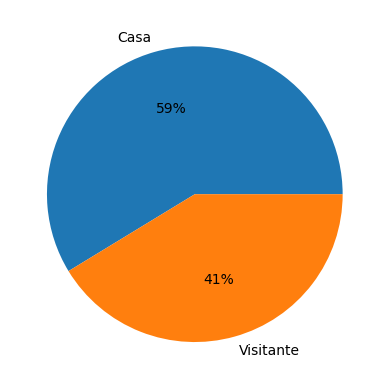

In [28]:
plt.pie(total.values, labels=['Casa', 'Visitante'], autopct='%.0f%%')
plt.show()

## Cantidad de puntos por equipo cuando juegan en casa o de visita


C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_11416\2924455086.py:3: FutureWarning: The provided callable <function mean at 0x0000026CC5487F60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')


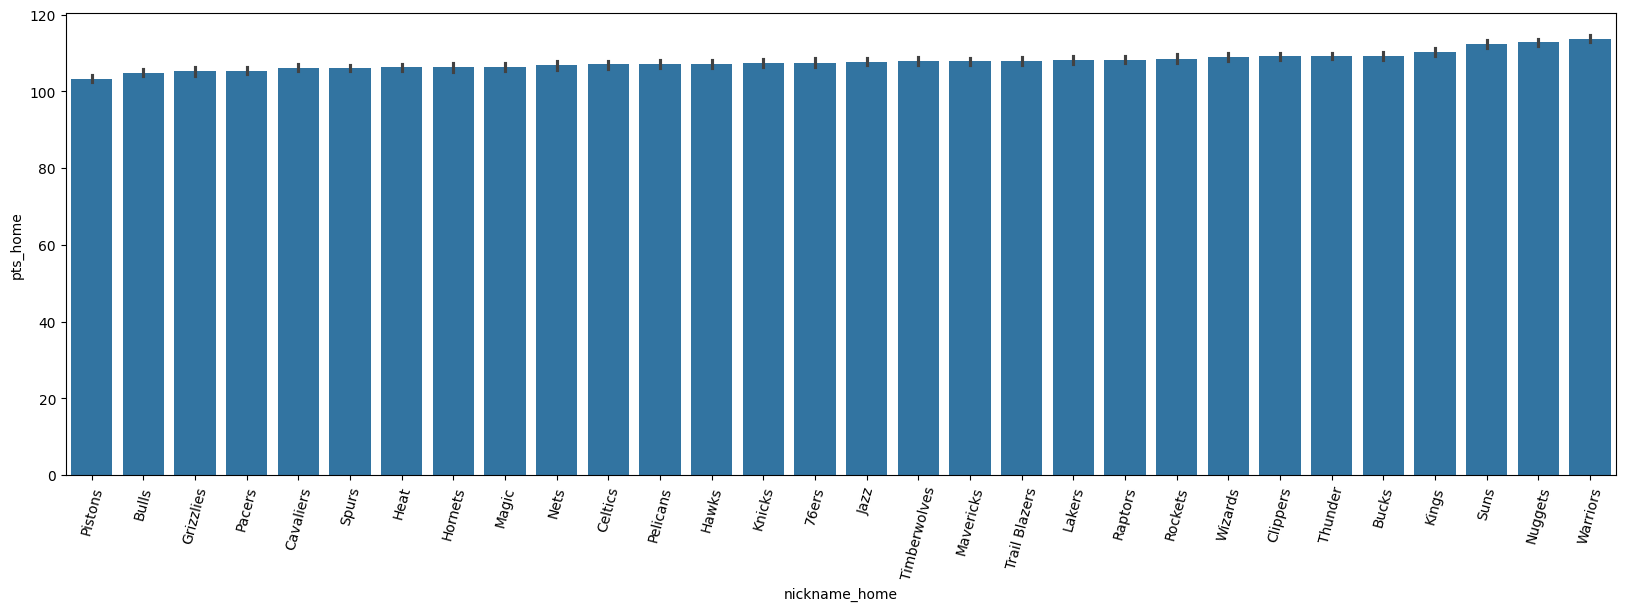

In [29]:
plt.figure(figsize=(20,6))
home_wins = games[games['home_team_wins'] == 1]
result = home_wins.groupby('nickname_home')['pts_home'].aggregate(np.mean).reset_index().sort_values('pts_home')

ax = sns.barplot(data=home_wins, x='nickname_home', y= 'pts_home', order=result['nickname_home'])
plt.xticks(rotation=75)
plt.show()

<Axes: xlabel='total_points', ylabel='Count'>

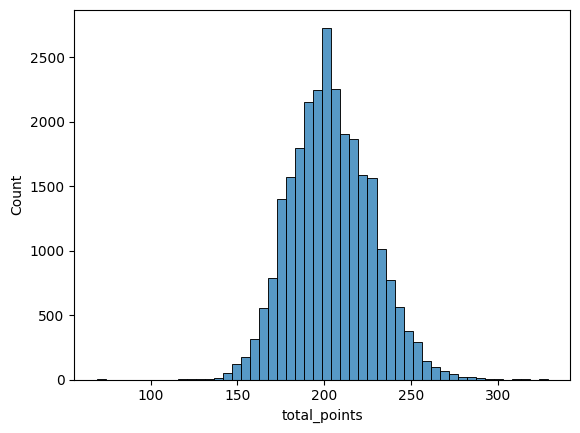

In [30]:
sns.histplot(data=games, x='total_points', bins=50)

<Axes: xlabel='total_points'>

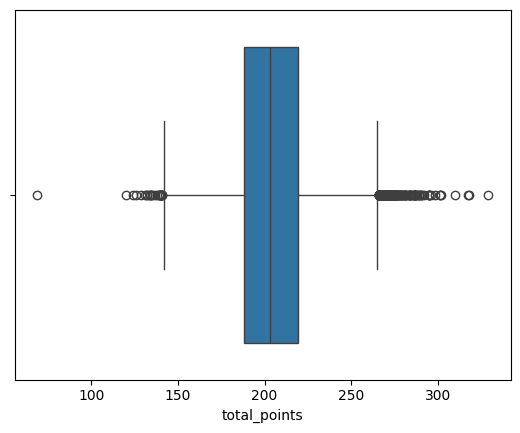

In [31]:
sns.boxplot(x=games['total_points'])

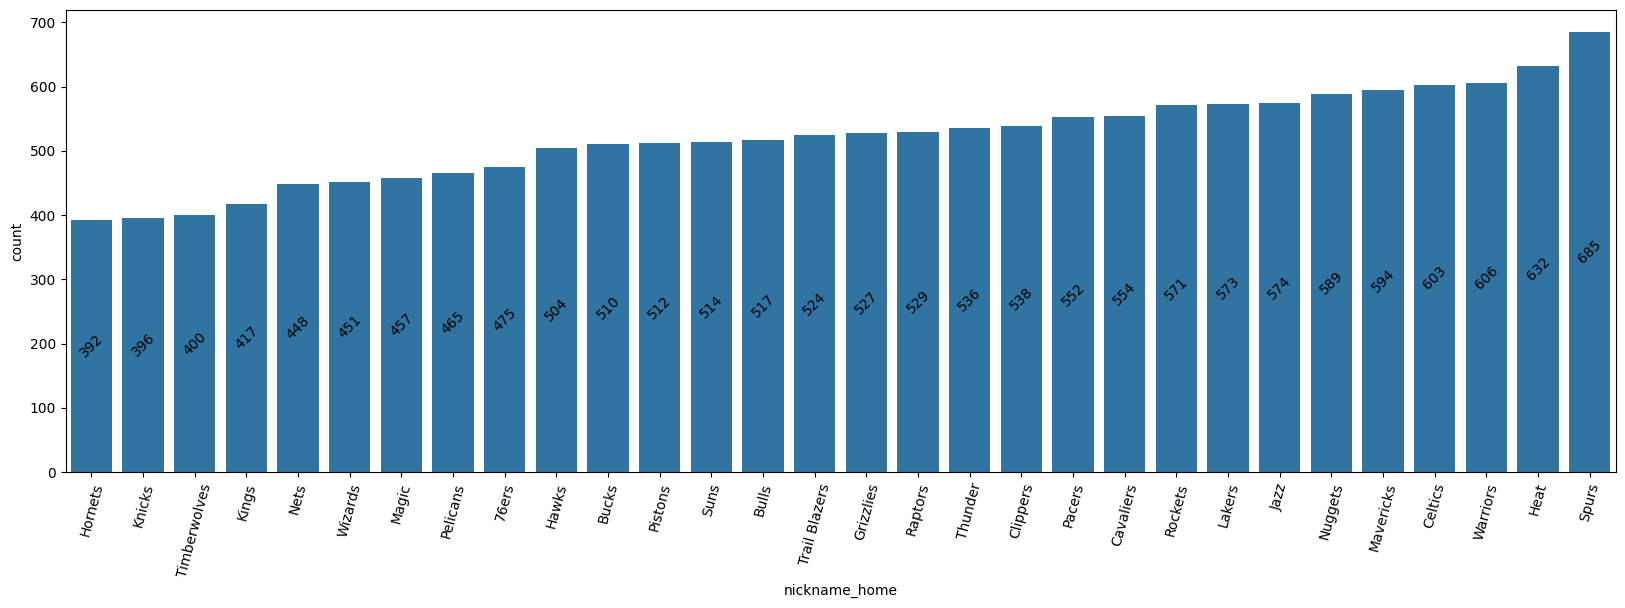

In [32]:
plt.figure(figsize=(20,6))
result = home_wins['nickname_home'].value_counts().sort_values()

ax = sns.countplot(x='nickname_home', data=home_wins, order=result.index)
ax.bar_label(ax.containers[-1], label_type='center', rotation=45)
plt.xticks(rotation=75)
plt.show()


In [34]:
games.groupby('year')['total_points'].mean()

year
2003    184.475269
2004    188.379151
2005    193.944251
2006    195.553411
2007    196.871795
2008    198.470180
2009    200.169468
2010    199.734637
2011    197.679781
2012    192.825949
2013    197.085196
2014    201.815406
2015    200.326991
2016    207.307908
2017    211.543402
2018    216.689580
2019    221.965465
2020    224.262899
2021    221.128160
2022    224.392377
Name: total_points, dtype: float64

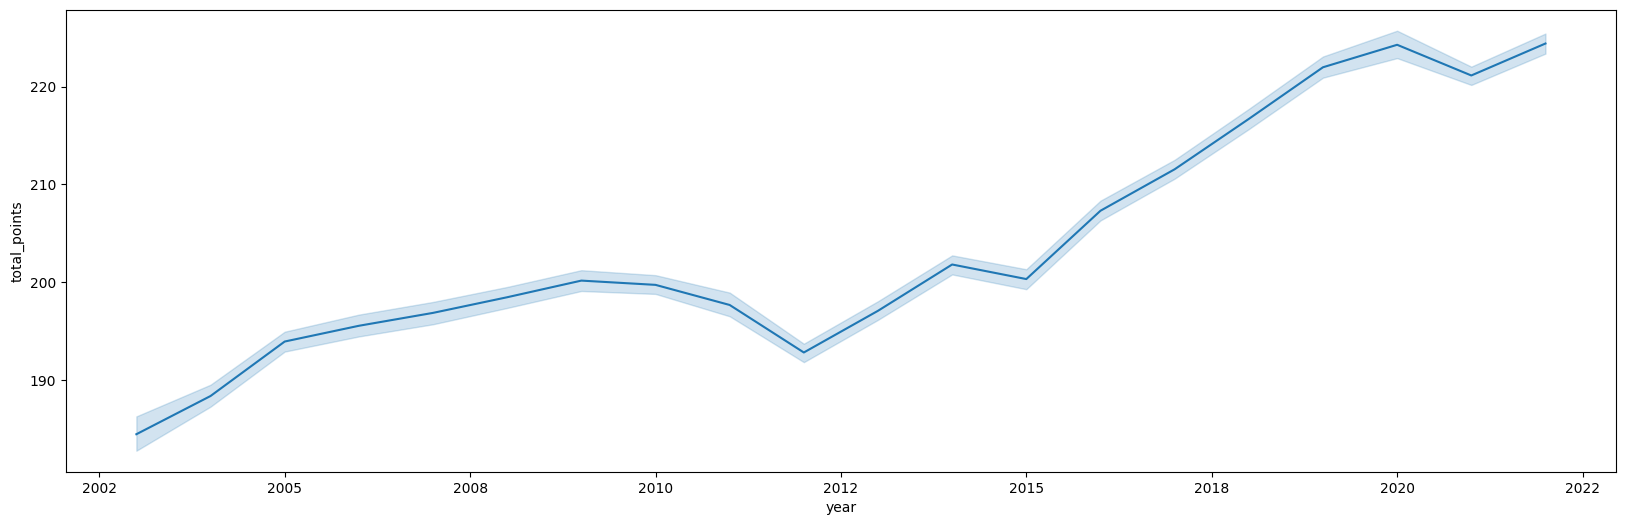

In [37]:
plt.figure(figsize=(20,6))

ax = sns.lineplot(data=games, x='year', y='total_points')

def format_xlabels(value, pos):
    return str(int(round(value)))

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_xlabels))

plt.show()

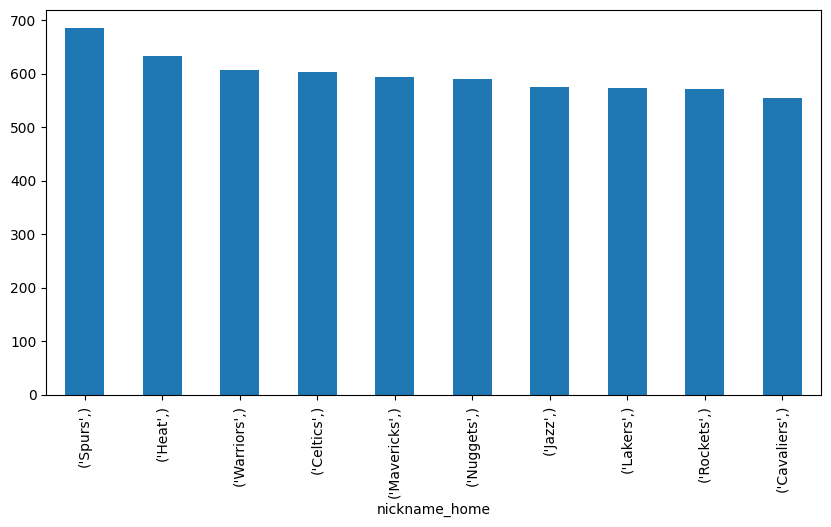

In [40]:
x = home_wins[['nickname_home']].value_counts()

ax = x[:10].plot(kind='bar', figsize=[10, 5])

ax.set_xticklabels(x.index[:10], rotation=90)

plt.show()